# Communities and Crime Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('files/dataframe.pkl')

## Regresja liniowa
Celem jest obliczenie zmiennej **ViolentCrimesPerPop** (liczbę przestępstw kryminalnychna 100 tys. populacji).

In [2]:
import sklearn.model_selection

In [3]:
# podział na zbiór trenujący/testowy
r_train, r_test = sklearn.model_selection.train_test_split(df, test_size = 0.1, random_state=42)

In [4]:
r_train.shape

(1794, 101)

In [5]:
r_test.shape

(200, 101)

Zakładamy w naszym przypadku, że liczba przestępstw będzie funkcją liniową odsetku imigrantów (**PctIlleg**). Tzn. im większy odsetek imigrantów, tym większa liczba przestępstw (**ViolentCrimesPerPop**).

Jeżeli zależność jest liniowa powinniśmy być w stanie narysować prostą przebiegającą możliwie blisko wszystkich naszych obserwacji.

### Praktyka w sklearn

In [6]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [7]:
regressor = LinearRegression()

X_train = r_train[['PctIlleg']]
X_test = r_test[['PctIlleg']]

y_train = r_train.ViolentCrimesPerPop
y_test = r_test.ViolentCrimesPerPop

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

baseline_RMSE = math.sqrt(mean_squared_error(y_pred, y_test))

print('Baseline test RMSE: ', baseline_RMSE)

Baseline test RMSE:  0.14577106304718196


In [8]:
def evaluate_regression(column_name):
    # narysujmy wykres danej cechy w funkcji ceny
    #sns.regplot(r_train[column_name], r_train.ViolentCrimesPerPop, color="indigo")

    # jakie RMSE uzyskamy dla tej cechy?
    regressor = LinearRegression()
    
    # w ten sposób podajemy kolumny jako listę wartości do naszego modelu
    # niestety nie akceptuje on pd.Series więc konwertujemy ją do listy
    X_train = r_train[column_name].values.reshape(-1, 1)
    y_train = r_train.ViolentCrimesPerPop.values.reshape(-1, 1)
    
    # właściwe trenowanie modelu
    regressor.fit(X_train,y_train)
    
    # otrzymane wartości współczynników kierunkowych
    print('a =', regressor.coef_)
    print('b =', regressor.intercept_)
    
    # obliczanie RMSE dla zbioru testowego i trenującego
    h_train = regressor.predict(X_train)
    X_test = r_test[column_name].values.reshape(-1, 1)
    y_test = r_test.ViolentCrimesPerPop.values.reshape(-1, 1)
    h_test = regressor.predict(X_test)
    
    print('train RMSE = ', math.sqrt(mean_squared_error(h_train, y_train)))
    print('test RMSE = ', math.sqrt(mean_squared_error(h_test, y_test)))
    print('baseline RMSE = ', baseline_RMSE)
    
    return regressor

- **PctIlleg** - odsetek dzieci nieślubnych.
- **racepctblack** - odsetek osób rasy czarnej.
- **FemalePctDiv** - odsetek rozwiedzionych kobiet.
- **PctUnemployed** - odsetek osób bezrobotnych.

In [9]:
evaluate_regression('PctIlleg')

a = [[0.74594654]]
b = [0.05276242]
train RMSE =  0.15841824656887998
test RMSE =  0.14577106304718196
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
evaluate_regression('racepctblack')

a = [[0.57368297]]
b = [0.13707797]
train RMSE =  0.18310134486753746
test RMSE =  0.15719932243345575
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
evaluate_regression('FemalePctDiv')

a = [[0.73976428]]
b = [-0.12151515]
train RMSE =  0.19498071057862915
test RMSE =  0.18077668523226328
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
evaluate_regression('PctUnemployed')

a = [[0.57812419]]
b = [0.03005586]
train RMSE =  0.20280662675110336
test RMSE =  0.18574826715839757
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

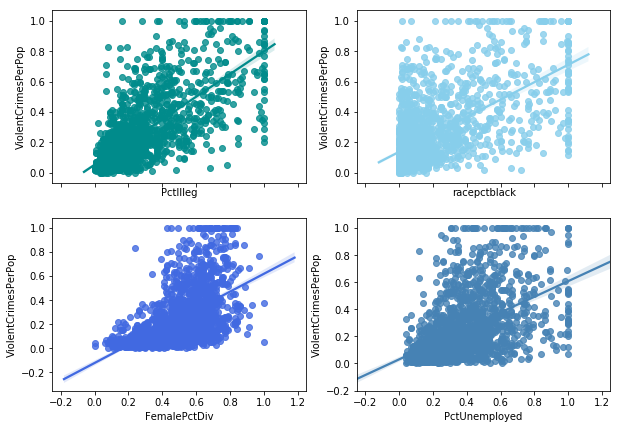

In [13]:
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True)
sns.regplot(r_train.PctIlleg, r_train.ViolentCrimesPerPop, color='darkcyan', ax=axes[0, 0])
sns.regplot(r_train.racepctblack, r_train.ViolentCrimesPerPop, color='skyblue', ax=axes[0, 1])
sns.regplot(r_train.FemalePctDiv, r_train.ViolentCrimesPerPop, color='royalblue', ax=axes[1, 0])
sns.regplot(r_train.PctUnemployed, r_train.ViolentCrimesPerPop, color='steelblue', ax=axes[1, 1])

- **PctKids2Par** - odsetek dzieci wychowywanych przez 2 rodziców.
- **racePctWhite** - odsetek osób rasy kaukaskiej.

In [14]:
evaluate_regression('PctKids2Par')

a = [[-0.83649646]]
b = [0.75785712]
train RMSE =  0.15844389916776944
test RMSE =  0.14420013295247738
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
evaluate_regression('racePctWhite')

a = [[-0.64769502]]
b = [0.72755117]
train RMSE =  0.17193659743551543
test RMSE =  0.14881426877926993
baseline RMSE =  0.14577106304718196


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

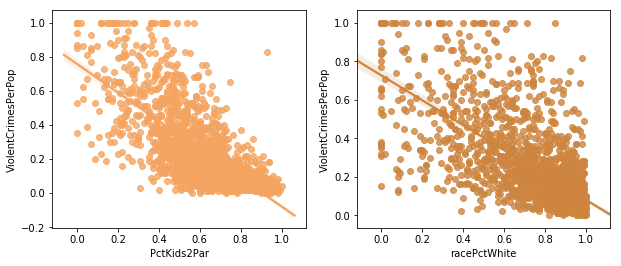

In [16]:
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.regplot(r_train.PctKids2Par, r_train.ViolentCrimesPerPop, color='sandybrown', ax=axes[0])
sns.regplot(r_train.racePctWhite, r_train.ViolentCrimesPerPop, color='peru', ax=axes[1])

## Regresja wielu zmiennych

In [17]:
def evaluate_multi_regression(features):
    label = ['ViolentCrimesPerPop']

    regressor = LinearRegression()
    X_train = r_train[features]
    y_train = r_train[label].values.reshape(-1, 1)

    X_test = r_test[features]
    y_test = r_test[label].values.reshape(-1, 1)
    regressor.fit(X_train,y_train)

    h_train = regressor.predict(X_train)
    h_test = regressor.predict(X_test)
    print('a1, a2  =', regressor.coef_[0])
    print('b=', regressor.intercept_)

    h_train = regressor.predict(X_train)
    print('RMSE train: ', math.sqrt(sklearn.metrics.mean_squared_error(h_train,y_train)))
    print('RMSE test: ', math.sqrt(sklearn.metrics.mean_squared_error(h_test,y_test)))
    print('baseline RMSE: ', baseline_RMSE)

In [18]:
features_1 = ['PctIlleg', 'racepctblack', 'FemalePctDiv', 'PctUnemployed', 'PctHousNoPhone']
evaluate_multi_regression(features_1)

a1, a2  = [ 0.49469758  0.09777976  0.30207277  0.11305043 -0.01966778]
b= [-0.08570714]
RMSE train:  0.15016409331015299
RMSE test:  0.13451298814318377
baseline RMSE:  0.14577106304718196


In [19]:
features_2 = ['PctKids2Par', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par']
evaluate_multi_regression(features_2)

a1, a2  = [-0.73319766  0.13863807 -0.29212149  0.00693675]
b= [0.82446582]
RMSE train:  0.14919391613057462
RMSE test:  0.12866459899030594
baseline RMSE:  0.14577106304718196


In [20]:
evaluate_multi_regression(features_1 + features_2)

a1, a2  = [ 0.29098003 -0.0289216   0.20419353  0.02299168 -0.06440252 -0.77218729
  0.46596387 -0.19031569 -0.01029651]
b= [0.42484806]
RMSE train:  0.1457125271636574
RMSE test:  0.12687203939917988
baseline RMSE:  0.14577106304718196


In [21]:
evaluate_multi_regression(features_1 + features_2 + ['MalePctNevMarr', 'PctSpeakEnglOnly'])

a1, a2  = [ 0.26983954  0.10535359  0.20105827 -0.00823659 -0.06233379 -0.62002203
  0.30696582 -0.05914154 -0.03296068 -0.03767702 -0.13955959]
b= [0.4631421]
RMSE train:  0.14470832567859804
RMSE test:  0.12631946478390063
baseline RMSE:  0.14577106304718196


In [22]:
evaluate_multi_regression(['PctIlleg', 'PctKids2Par', 'racePctWhite']) # regresja trzech zmiennych

a1, a2  = [ 0.20828186 -0.44306918 -0.22893573]
b= [0.63412917]
RMSE train:  0.14791913957027505
RMSE test:  0.13012597316275362
baseline RMSE:  0.14577106304718196


## PCA - Principal Component Analysis

In [23]:
df = pd.read_pickle('files/dataframe.pkl')

In [24]:
from sklearn.preprocessing import StandardScaler
features = ['PctKids2Par', 'PctFam2Par', 'racePctWhite', 'PctYoungKids2Par']
x = df.loc[:, features].values
y = df.loc[:,['ViolentCrimesPerPop']].values
x = StandardScaler().fit_transform(x) # średnia = 0, odchylenie standardowe = 1

In [25]:
scaled_x = pd.DataFrame.from_records(x)
scaled_x.columns = features
scaled_x

,PctKids2Par,PctFam2Par,racePctWhite,PctYoungKids2Par
0,-0.148603,-0.301684,0.599578,-0.247067
1,-0.730275,-0.895963,-0.056219,-0.292792
2,-0.875693,-0.945486,-0.793990,-1.070133
3,-0.390966,0.193548,-2.761379,0.758903
4,1.402524,1.481151,0.804514,1.033258
5,0.336124,0.044978,-0.875964,0.941807
6,0.917797,0.787826,0.927476,0.575999
7,-0.924166,-0.796916,-1.203862,-1.481666
8,-0.342493,-0.499777,0.353654,-0.384244
9,0.530015,0.193548,0.476616,0.530274


In [26]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x)

In [27]:
pca.components_

array([[-5.33316755e-01, -5.26099566e-01, -4.19905017e-01,
        -5.12320469e-01],
       [ 1.35611967e-01,  2.59169716e-01, -8.97995934e-01,
         3.28700099e-01],
       [-4.01026363e-01, -4.46659498e-01,  1.00942666e-01,
         7.93400105e-01],
       [-7.32366363e-01,  6.75681581e-01,  8.42238510e-02,
        -5.04668168e-04]])

In [28]:
pca.explained_variance_ratio_

array([0.85481542, 0.1228421 , 0.01963885, 0.00270362])

In [29]:
pca.explained_variance_ratio_.cumsum()

array([0.85481542, 0.97765753, 0.99729638, 1.        ])

In [30]:
data = pca.explained_variance_ratio_.cumsum()[::-1]

In [31]:
data

array([1.        , 0.99729638, 0.97765753, 0.85481542])

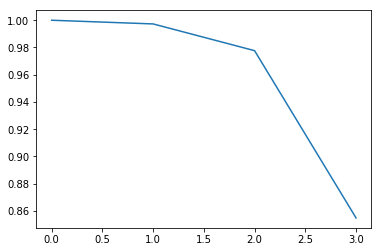

In [32]:
sns.lineplot(y =data, x = list(range(len(data))))

In [33]:
x[0]

array([-0.14860259, -0.30168421,  0.59957757, -0.24706658])

In [34]:
principalComponents[0]

array([ 0.11277982, -0.71796873,  0.05884398, -0.0443875 ])

In [35]:
pca.transform([x[0]])

array([[ 0.11277982, -0.71796873,  0.05884398, -0.0443875 ]])

In [36]:
np.dot( pca.components_, x[0])

array([ 0.11277982, -0.71796873,  0.05884398, -0.0443875 ])

In [37]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['ViolentCrimesPerPop']]], axis = 1)

In [38]:
pca.explained_variance_ratio_.cumsum() # skumulowana wariancja tłumaczona przez komponenty

array([0.85481542, 0.97765753])

In [39]:
finalDf

,principal component 1,principal component 2,ViolentCrimesPerPop
0,0.112780,-0.717969,0.20
1,1.034443,-0.376997,0.67
2,1.846092,-0.002549,0.43
3,0.877398,2.726300,0.12
4,-2.394401,0.191250,0.03
5,-0.317609,1.153424,0.14
6,-1.588499,-0.314893,0.03
7,2.176726,0.262175,0.55
8,0.493945,-0.619854,0.53
9,-0.856295,-0.131660,0.15


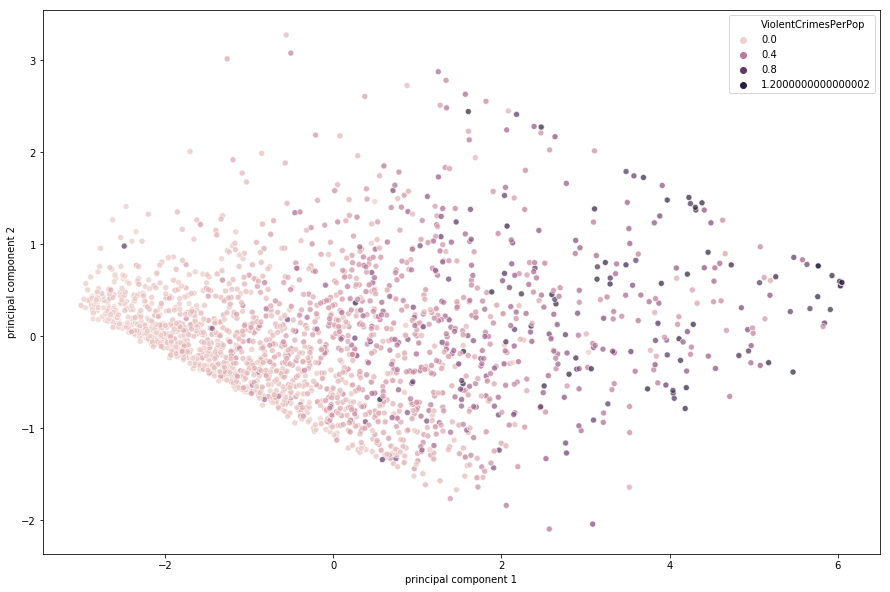

In [40]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data = finalDf, x = 'principal component 1', y = 'principal component 2', hue='ViolentCrimesPerPop', alpha=0.7, legend="brief")

### Włączenie PCA i t-SNE na tych samych danych

In [41]:
from sklearn.manifold import TSNE

scaled_df = StandardScaler().fit_transform(df)
X_tsne = TSNE(learning_rate=100, verbose=1, perplexity=40, n_iter=300).fit_transform(scaled_df)
X_pca = PCA().fit_transform(scaled_df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1994 samples in 0.005s...
[t-SNE] Computed neighbors for 1994 samples in 1.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1994
[t-SNE] Computed conditional probabilities for sample 1994 / 1994
[t-SNE] Mean sigma: 2.807084
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.263626
[t-SNE] KL divergence after 300 iterations: 1.622270


### t-SNE

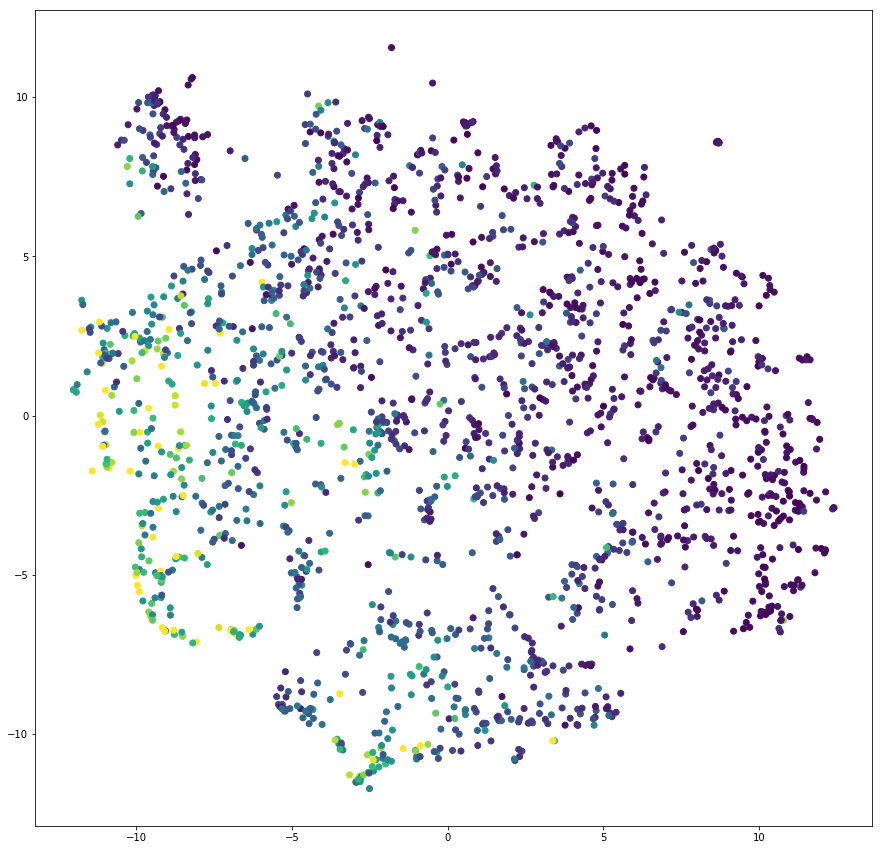

In [42]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df.ViolentCrimesPerPop)

### PCA

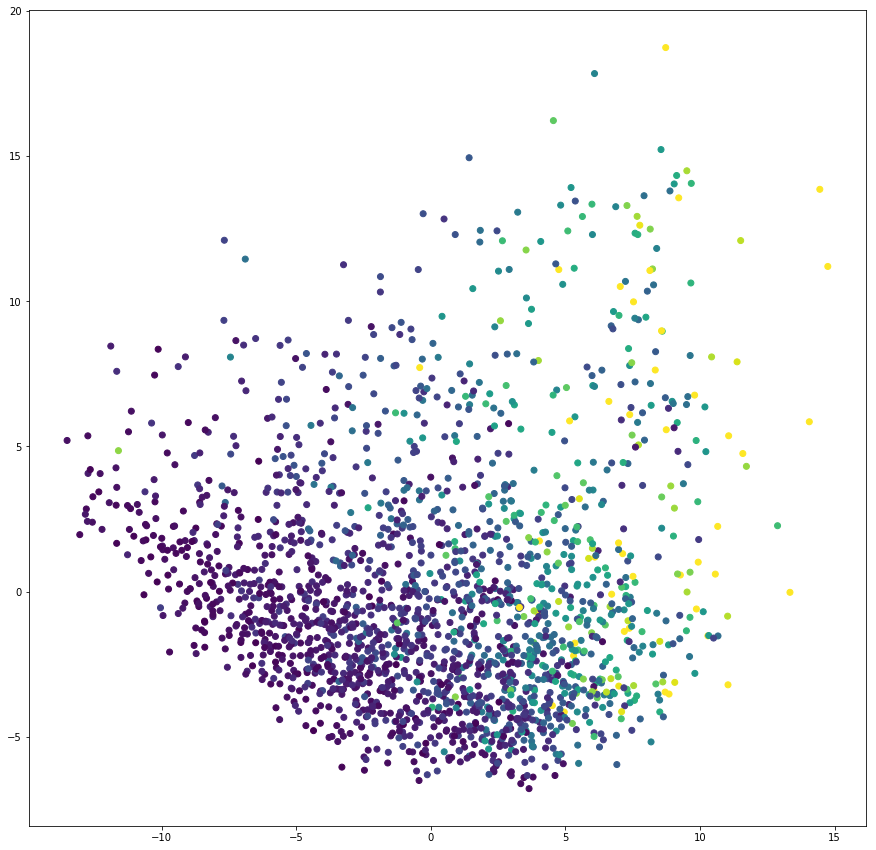

In [43]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=df.ViolentCrimesPerPop, label=df.ViolentCrimesPerPop)